Loaded Foundation Zero-Shot
Loaded Foundation Few-Shot
Loaded Ensemble Zero-Shot
Loaded Ensemble Few-Shot


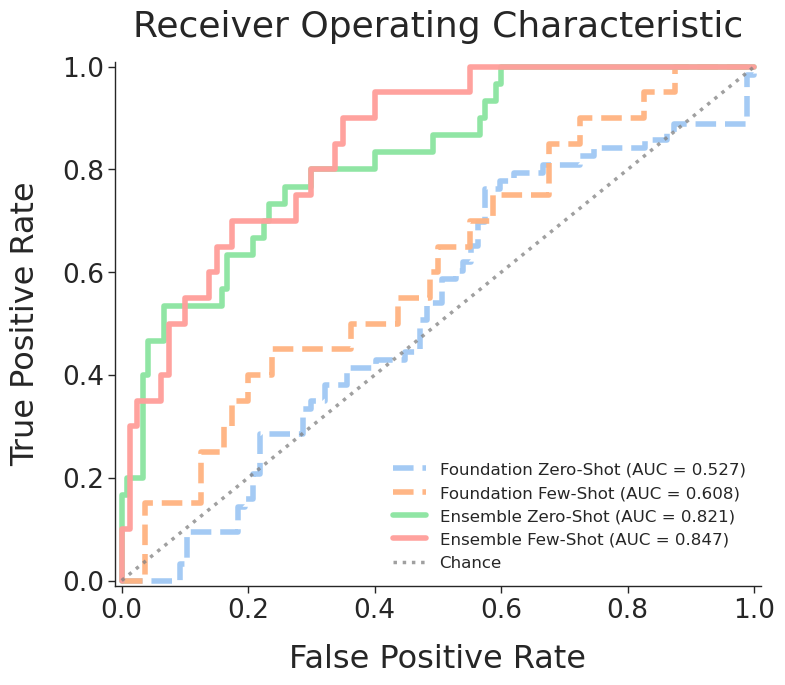

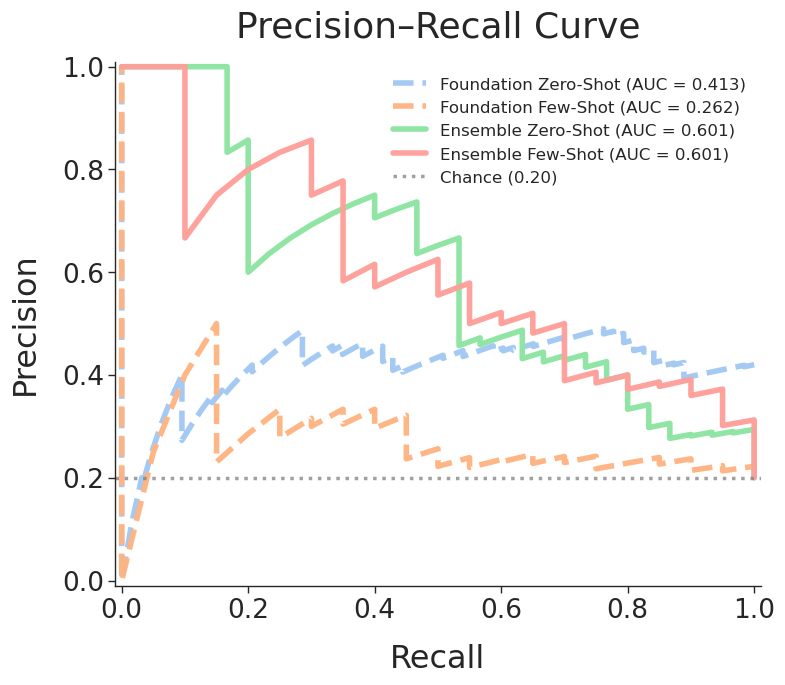

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Load data
files = {
    'Foundation Zero-Shot': ('foundationZeroShotPreds.npy', 'foundationZeroShotGTs.npy'),
    'Foundation Few-Shot':  ('foundationFewShotPreds.npy', 'foundationFewShotGTs.npy'),
    'Ensemble Zero-Shot':   ('ensembleZeroShotProbs.npy', 'zeroShotEnsembleGTs.npy'),
    'Ensemble Few-Shot':    ('ensembleFewShotProbs.npy', 'fewShotEnsembleGTs.npy')
}

data = {}
for name, (pred_path, gt_path) in files.items():
    try:
        preds = np.load(pred_path).flatten()
        gts = np.load(gt_path).flatten()
        data[name] = {'preds': preds, 'gts': gts}
        print(f"Loaded {name}")
    except FileNotFoundError:
        print(f"Skipping {name} (File not found)")

sns.set_theme(style="ticks", context="paper", font_scale=1.2)

colors = sns.color_palette("pastel", 4)

fig_roc, ax_roc = plt.subplots(figsize=(8, 7))
fig_pr, ax_pr = plt.subplots(figsize=(8, 7))

for i, (name, content) in enumerate(data.items()):
    y_true = content['gts']
    y_scores = content['preds']
    color = colors[i]

    ls = '-' if 'Ensemble' in name else '--'

    # --- A. ROC Curve ---
    fpr, tpr, _ = roc_curve(y_true, y_scores)
    roc_auc = auc(fpr, tpr)

    ax_roc.plot(
        fpr, tpr,
        color=color,
        linestyle=ls,
        linewidth=4,
        alpha=0.97,
        label=f'{name} (AUC = {roc_auc:.3f})'
    )

    precision, recall, _ = precision_recall_curve(y_true, y_scores)
    pr_auc = auc(recall, precision)

    ax_pr.plot(
        recall, precision,
        color=color,
        linestyle=ls,
        linewidth=4,
        alpha=0.97,
        label=f'{name} (AUC = {pr_auc:.3f})'
    )

prevalence = np.sum(y_true) / len(y_true)
ax_pr.axhline(
    y=prevalence,
    color='gray',
    linestyle=':',
    linewidth=2.5,
    alpha=0.75,
    label='Chance (0.20)'
)

ax_roc.plot(
    [0, 1], [0, 1],
    color='gray',
    linestyle=':',
    linewidth=2.5,
    alpha=0.75,
    label='Chance'
)

ax_roc.set_title('Receiver Operating Characteristic', fontsize=26, pad=18)
ax_roc.set_xlabel('False Positive Rate', fontsize=23, labelpad=15)
ax_roc.set_ylabel('True Positive Rate', fontsize=23, labelpad=15)

ax_roc.set_xlim([-0.01, 1.01])
ax_roc.set_ylim([-0.01, 1.01])

roc_leg = ax_roc.legend(
    loc="lower right",
    fontsize=12,

)
roc_leg.get_frame().set_linewidth(0.0)

# --- PR Plot ---
ax_pr.set_title('Precision–Recall Curve', fontsize=26, pad=18)
ax_pr.set_xlabel('Recall', fontsize=23, labelpad=15)
ax_pr.set_ylabel('Precision', fontsize=23, labelpad=15)

ax_pr.set_xlim([-0.01, 1.01])
ax_pr.set_ylim([-0.01, 1.01])

pr_leg = ax_pr.legend(
    loc="upper right",
    fontsize=12,

)
pr_leg.get_frame().set_linewidth(0.0)

# --- Unified Styling ---
for ax in [ax_roc, ax_pr]:
    ax.tick_params(axis='both', which='major', labelsize=19)
    ax.set_axisbelow(True)
    sns.despine(ax=ax)

fig_roc.tight_layout()
fig_pr.tight_layout()

fig_roc.savefig('roc_curve_styled_pastel.tiff', dpi=350, bbox_inches='tight')
fig_pr.savefig('pr_curve_styled_pastel.tiff', dpi=350, bbox_inches='tight')

plt.show()
